In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [21]:
import re
import pandas as pd
import numpy as np
import random
import nltk
import sklearn
#uncomment if gutenberg is not already downlaoded
#nltk.download('gutenberg')
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import corpora, models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp
from sklearn import preprocessing
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [9]:
def get_book_partitions(book_name, partition_size=100, num_partitions=200):

	# Download the book
	words = gutenberg.words(book_name)

	# Get the total number of words in the book
	total_words = len(words)

	# Randomly select starting indices for the partitions
	partition_indices = random.sample(
		range(0, total_words - partition_size), num_partitions)

	# Create a dictionary to store the partitions and their labels
	partitions = {}

	for i, index in enumerate(partition_indices):
		# Get the partition text
		partition = " ".join(words[index:index+partition_size])

		# Clean the text
		partition = re.sub(r"[^a-zA-Z0-9]+", ' ', partition)

		# Create a label for the partition
		label = "{}_{}".format(i, book_name)  # include book name in the label

		# Add the partition and its label to the dictionary
		partitions[label] = partition

	# Convert the partitions dictionary to a DataFrame
	partitions_df = pd.DataFrame.from_dict(
		partitions, orient='index', columns=['text'])
	partitions_df.reset_index(inplace=True)
	partitions_df.rename(columns={'index': 'label'}, inplace=True)

	return partitions_df

def create_dataframe(text, author_name, genre):
	partitions = get_book_partitions(text)
	partitions["author_name"] = author_name
	partitions["genre"] = genre
	return partitions

# Print the list of available books
# print("List of available books: ", gutenberg.fileids())

books = [ 
		{ 
			"file": 'carroll-alice.txt',
			"author": "Carroll",
			"genre": "Fiction"
		},
		{
			"file": 'shakespeare-hamlet.txt',
			"author": "Shakespeare",
			"genre": "Fiction"
		},
		{
			"file": 'bryant-stories.txt',
			"author": "Bryant",
			"genre": "Fiction"
		},
		{
			"file": 'melville-moby_dick.txt',
			"author": "Melville",
			"genre": "Fiction"
		},
		{
			"file": 'milton-paradise.txt',
			"author": "Milton",
			"genre": "Fiction"
		}
	]

for book in books: 
	df = create_dataframe(book["file"], book["author"], book["genre"])
	book["df"] = df

result = pd.concat([x["df"] for x in books])

# Make a csv file of the partitions to make the data easier to consume

result.to_csv("book_partitions.csv", index=False)

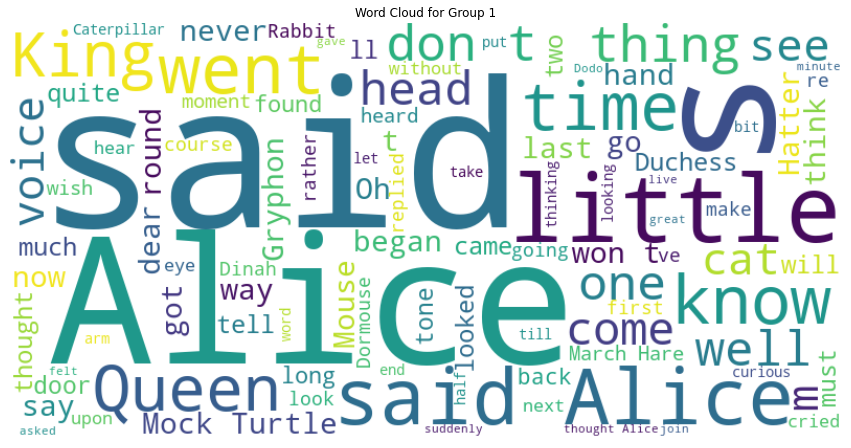

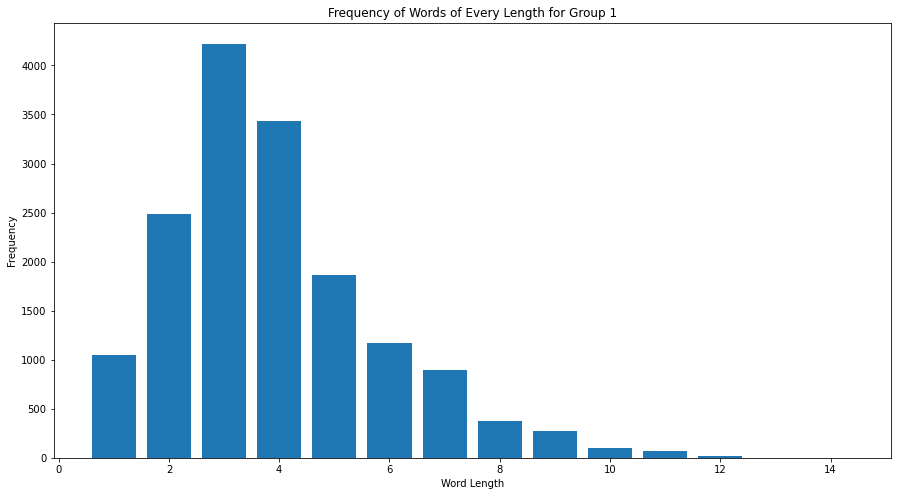

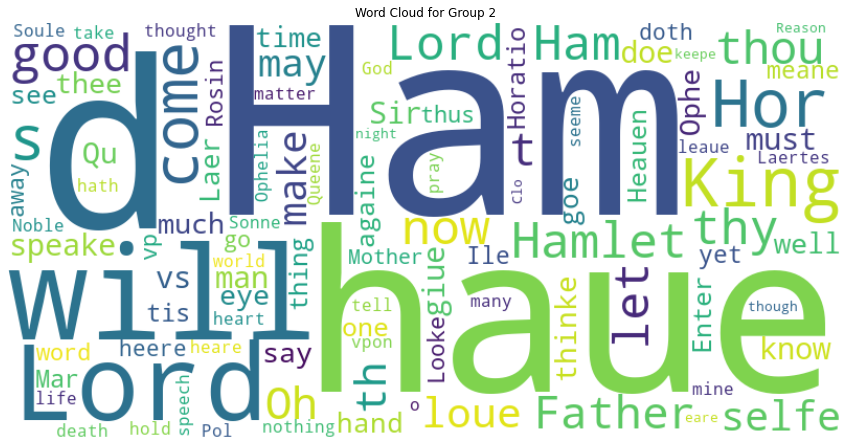

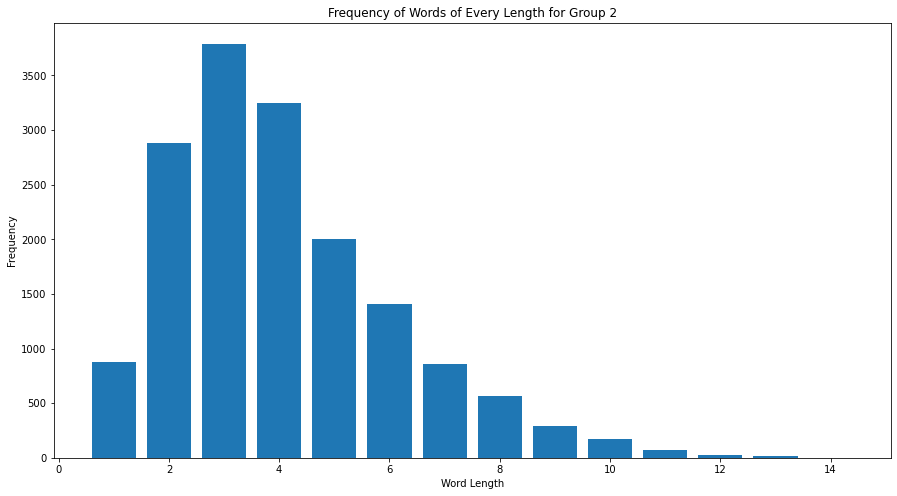

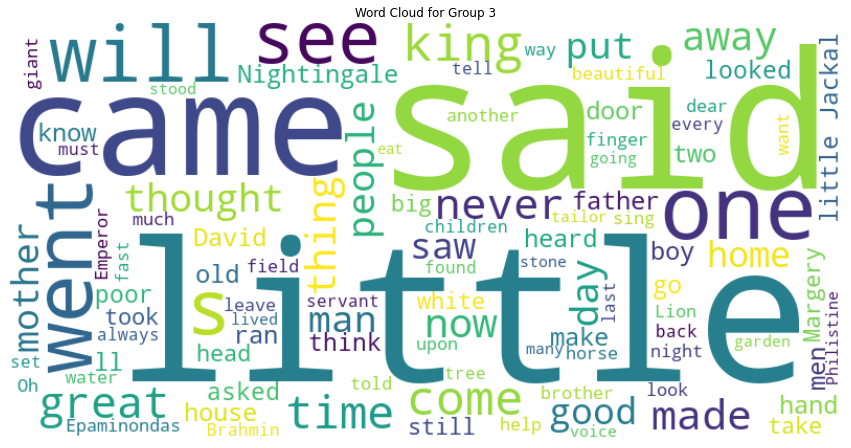

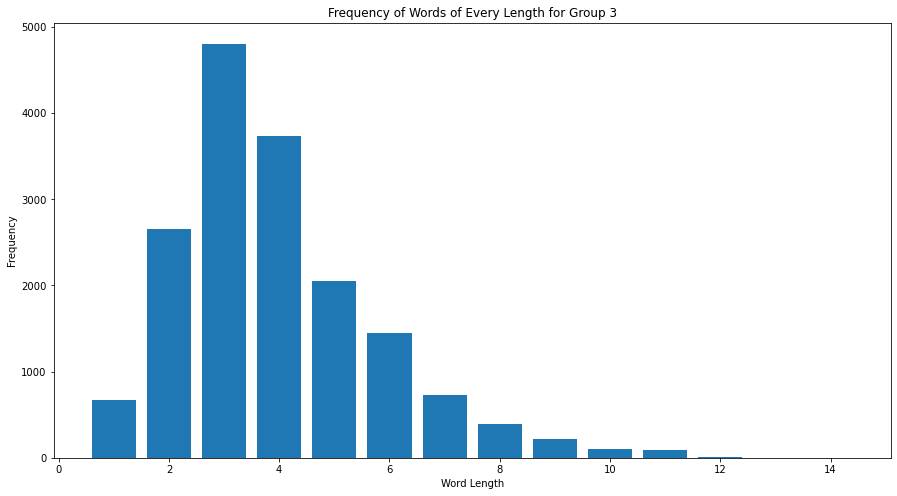

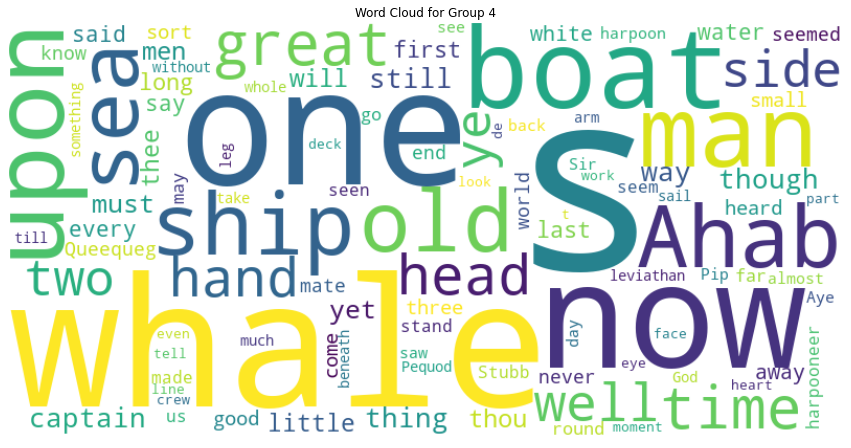

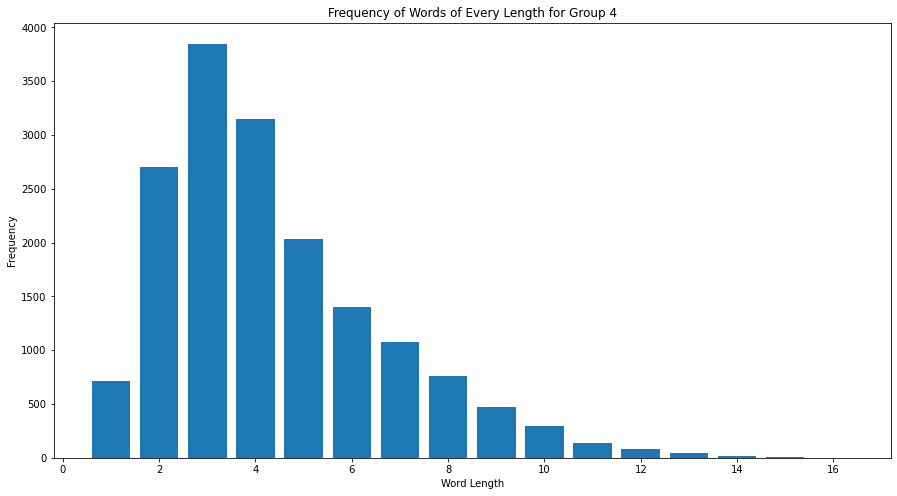

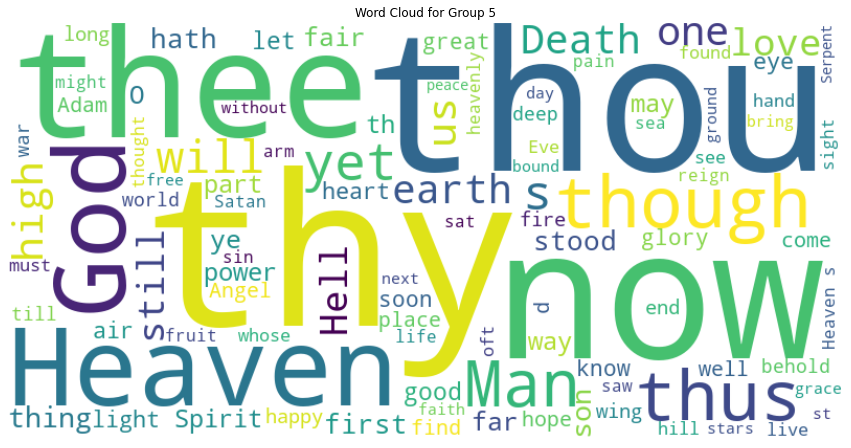

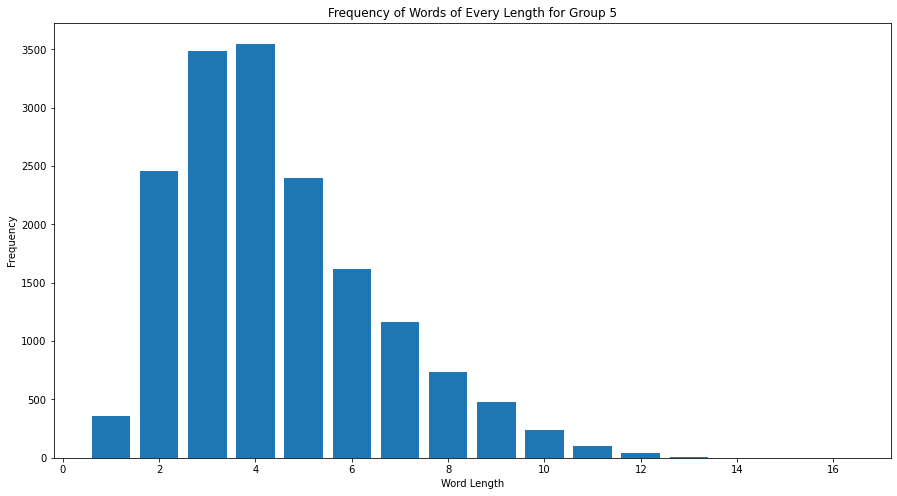

In [10]:
# Load the dataset
df = pd.read_csv("book_partitions.csv")

# Split the text column into groups of 200 cells
text_columns = [df["text"][i:i+200] for i in range(0, len(df), 200)]
# Generate a word cloud for each group of 200 cells
for i, text_column in enumerate(text_columns):
    text = " ".join(text_column.tolist())
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Group {i+1}')
    plt.show()


# Plot the frequency of words of every length
    words_lengths = [len(word) for word in text.split()]
    length_counts = pd.Series(words_lengths).value_counts().sort_index()
    plt.figure(figsize=(15, 8))
    plt.bar(length_counts.index, length_counts.values)
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Words of Every Length for Group {i+1}')
    plt.show()

In [11]:
X = result['text'].values
y = result['author_name'].values


In [12]:
#Feature Engineering
#BOW
count = CountVectorizer(min_df=3, analyzer='word', ngram_range=(1,2)) #Ignoring frequency <3 and considering both uni and bi-grams
bow = count.fit_transform(X)
array_bow = bow.toarray()
BOW_feature_names = count.get_feature_names_out()
X_BOW = pd.DataFrame(bow.toarray(), columns=BOW_feature_names) 
X_BOW

,abhorred,able,able to,aboard,about,about among,about and,about as,about at,about her,...,your pocket,your selfe,your sonne,your soueraignty,yours,yourself,youth,youth and,zelia,zone
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#TD_IDF
tf = TfidfVectorizer(analyzer='word',min_df= 3, ngram_range=(1, 2))
Tfid = tf.fit_transform(X)
array_tfid = Tfid.toarray()
tfid_feature_names = tf.get_feature_names_out()
X_Tfid = pd.DataFrame(Tfid.toarray(), columns=tfid_feature_names)
X_Tfid

,abhorred,able,able to,aboard,about,about among,about and,about as,about at,about her,...,your pocket,your selfe,your sonne,your soueraignty,yours,yourself,youth,youth and,zelia,zone
0,0.0,0.0,0.0,0.0,0.056556,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.107989,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#n-gram
# building a bigram model
# bigrams of words in addition to unigrams (individual words)
bigram_vectorizer = CountVectorizer(analyzer='word',min_df= 3, ngram_range=(1,2))

bigram = bigram_vectorizer.fit_transform(X)
array_bigram = bigram.toarray()
bigram_features = bigram_vectorizer.get_feature_names_out()
X_bigram = pd.DataFrame(array_bigram, columns= bigram_features)
X_bigram

,abhorred,able,able to,aboard,about,about among,about and,about as,about at,about her,...,your pocket,your selfe,your sonne,your soueraignty,yours,yourself,youth,youth and,zelia,zone
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Classification

In [16]:
def get_misclassified(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    misclassified = []
    for i in range(len(y_test)):
        if y_test[i] != y_pred[i]:
            misclassified.append((i, y_test[i], y_pred[i]))
    return misclassified

In [20]:
def curveplot(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
    return plt

Accuracy of decision tree (BOW):  0.7
Precision: 0.7041478332987767
Recall: 0.7129972117535314
F1 Score: 0.6941227528112444


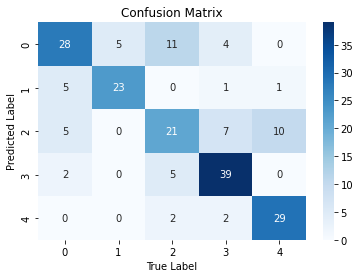

<module 'matplotlib.pyplot' from 'C:\\Users\\aurov\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

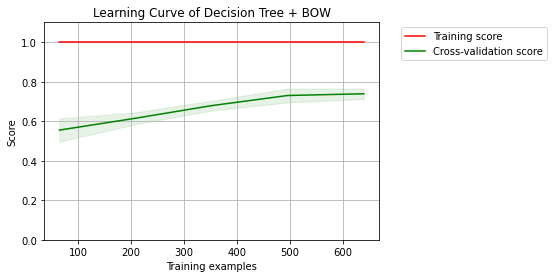

In [22]:
#1. Decision tree
# Decision tree on BOW
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_BOW, y, test_size=0.2)

#Train the decision tree model using the BOW features
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

#Predict the author name using the test data
y_pred = dtc.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

#Calculate F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of decision tree (BOW): ", accuracy)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
curveplot(dtc,"Learning Curve of Decision Tree + BOW",X_train, y_train, ylim=(0, 1.1), n_jobs=8)

Accuracy of decision tree (TF-IDF):  0.75
Precision: 0.7478354194115063
Recall: 0.747552141268978
F1 Score: 0.7483801706355832


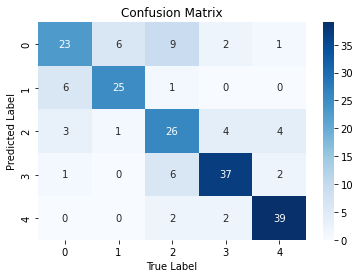

<module 'matplotlib.pyplot' from 'C:\\Users\\aurov\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

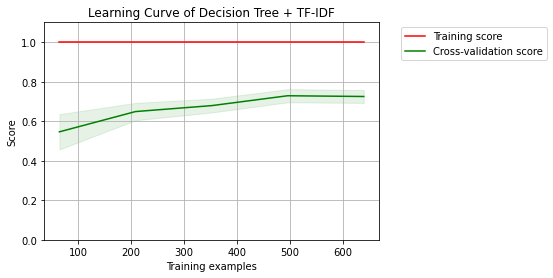

In [23]:
# Decision tree on TF-IDF
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_Tfid, y, test_size=0.2)

#Train the decision tree model using the BOW features
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

#Predict the author name using the test data
y_pred = dtc.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

#Calculate F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of decision tree (TF-IDF): ", accuracy)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
curveplot(dtc,"Learning Curve of Decision Tree + TF-IDF",X_train, y_train, ylim=(0, 1.1), n_jobs=8)

Accuracy of decision tree (N-gram):  0.79
Precision: 0.8019791685640213
Recall: 0.7934763067980337
F1 Score: 0.7916696787148595


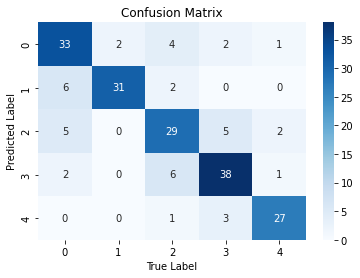

<module 'matplotlib.pyplot' from 'C:\\Users\\aurov\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

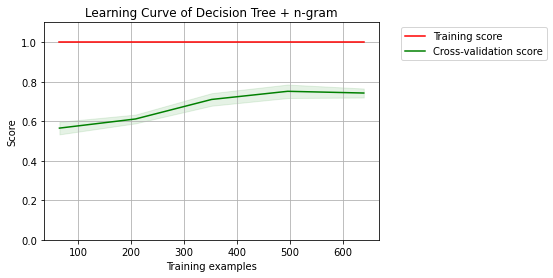

In [24]:
# Decision tree on N-gram
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bigram, y, test_size=0.2)

#Train the decision tree model using the BOW features
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

#Predict the author name using the test data
y_pred = dtc.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

#Calculate F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of decision tree (N-gram): ", accuracy)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
curveplot(dtc,"Learning Curve of Decision Tree + n-gram",X_train, y_train, ylim=(0, 1.1), n_jobs=8)

Accuracy of KNN (BOW): 0.605
Precision: 0.7911456347988856
Recall: 0.6017824161900817
F1 Score: 0.6004721500787714


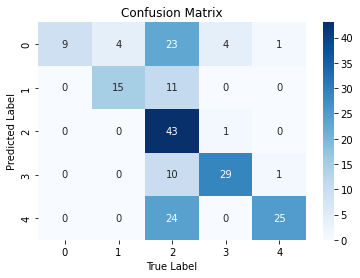

<module 'matplotlib.pyplot' from 'C:\\Users\\aurov\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

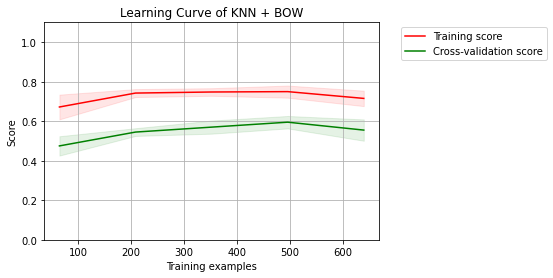

In [25]:
#2.KNN
#KNN on BOW
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_BOW, y, test_size=0.2, random_state=0)

#Train the KNN classifier using BOW features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Make predictions on the test set
y_pred = knn.predict(X_test)

#Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of KNN (BOW):", accuracy)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
curveplot(knn,"Learning Curve of KNN + BOW",X_train, y_train, ylim=(0, 1.1), n_jobs=8)

Accuracy of KNN (TF-IDF): 0.905
Precision: 0.901710189452125
Recall: 0.9138565093443141
F1 Score: 0.9052131734709513


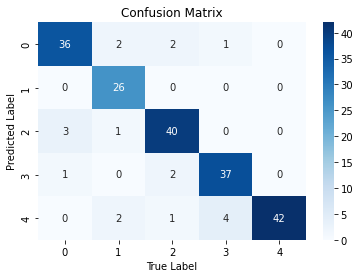

<module 'matplotlib.pyplot' from 'C:\\Users\\aurov\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

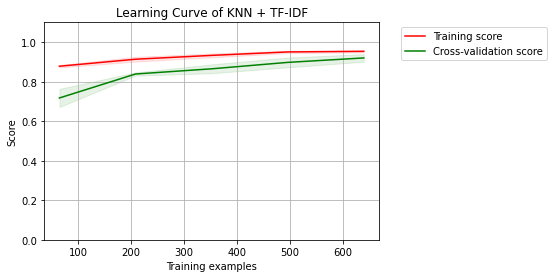

In [26]:
#KNN on TF-IDF
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Tfid, y, test_size=0.2, random_state=0)

#Train the KNN classifier using TF-IDF features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Make predictions on the test set
y_pred = knn.predict(X_test)

#Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of KNN (TF-IDF):", accuracy)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
curveplot(knn,"Learning Curve of KNN + TF-IDF",X_train, y_train, ylim=(0, 1.1), n_jobs=8)

Accuracy of KNN (N-gram): 0.605
Precision: 0.7911456347988856
Recall: 0.6017824161900817
F1 Score: 0.6004721500787714


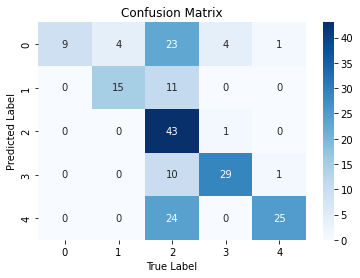

<module 'matplotlib.pyplot' from 'C:\\Users\\aurov\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

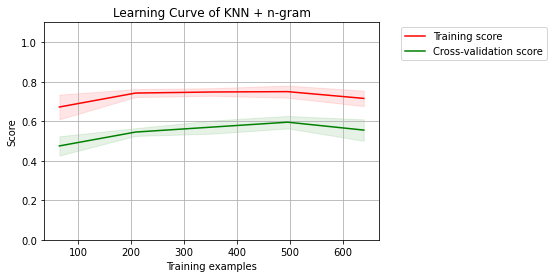

In [27]:
#KNN on N-gram
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bigram, y, test_size=0.2, random_state=0)

#Train the KNN classifier using N-gram features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Make predictions on the test set
y_pred = knn.predict(X_test)

#Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of KNN (N-gram):", accuracy)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
curveplot(knn,"Learning Curve of KNN + n-gram",X_train, y_train, ylim=(0, 1.1), n_jobs=8)

Accuracy of SVM classifier (BOW): 0.915
Precision: 0.9172332015810276
Recall: 0.9121651252377159
F1 Score: 0.9156069916817542


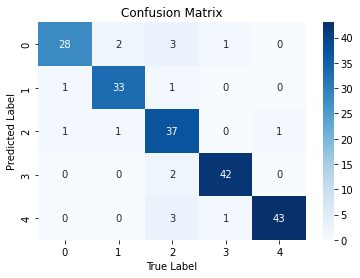

<module 'matplotlib.pyplot' from 'C:\\Users\\aurov\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

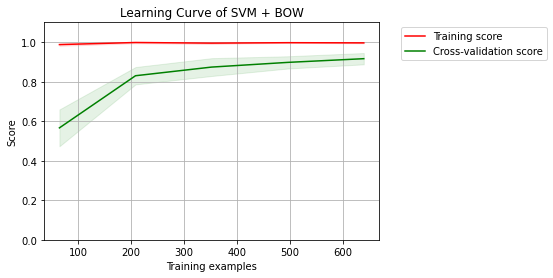

In [28]:
#3.SVM
#SVM on BOW

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_BOW, y, test_size=0.2)

#Initialize the SVM classifier with a radial basis function kernel
clf = SVC(kernel='rbf', random_state=0)

#Train the classifier on the training data
clf.fit(X_train, y_train)

#Predict the labels for the test data
y_pred = clf.predict(X_test)

#Evaluate the performance of the classifier
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of SVM classifier (BOW):", acc)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
curveplot(clf,"Learning Curve of SVM + BOW",X_train, y_train, ylim=(0, 1.1), n_jobs=8)

Accuracy of SVM classifier (TF-IDF): 0.97
Precision: 0.9716347144918572
Recall: 0.9710714285714286
F1 Score: 0.9700062720681857


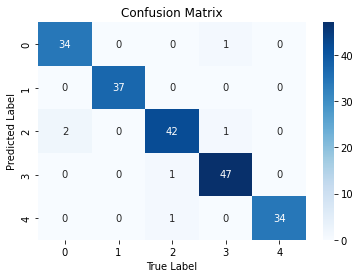

[(15, 'Melville', 'Bryant'), (101, 'Melville', 'Bryant'), (111, 'Shakespeare', 'Melville'), (156, 'Melville', 'Milton'), (167, 'Milton', 'Melville'), (180, 'Bryant', 'Milton')]


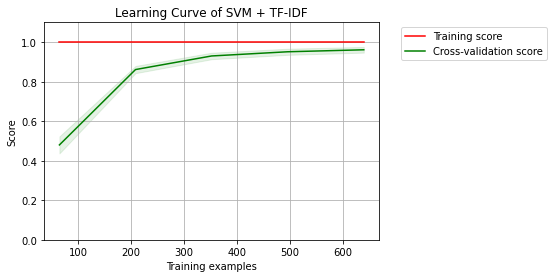

In [29]:
#SVM on TF-IDF

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Tfid, y, test_size=0.2)

#Initialize the SVM classifier with a radial basis function kernel
clf = SVC(kernel='rbf', random_state=0)

#Train the classifier on the training data
clf.fit(X_train, y_train)

#Predict the labels for the test data
y_pred = clf.predict(X_test)

#Evaluate the performance of the classifier
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of SVM classifier (TF-IDF):", acc)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
curveplot(clf,"Learning Curve of SVM + TF-IDF",X_train, y_train, ylim=(0, 1.1), n_jobs=8)
#Error Analysis
classification_error  = get_misclassified(clf, X_test, y_test)
print(classification_error)


Accuracy of SVM classifier (N-gram): 0.92
Precision: 0.9233705475810738
Recall: 0.9196573751451801
F1 Score: 0.9208331912619464


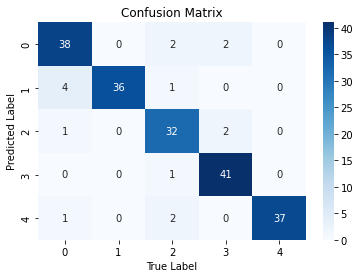

<module 'matplotlib.pyplot' from 'C:\\Users\\aurov\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

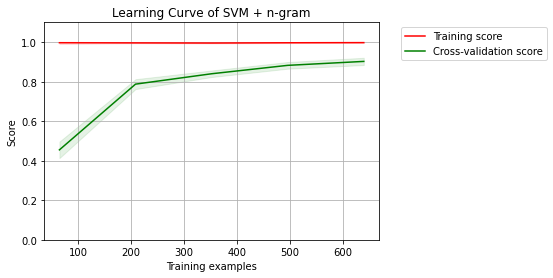

In [30]:
#SVM on N-gram

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_bigram, y, test_size=0.2)

#Initialize the SVM classifier with a radial basis function kernel
clf = SVC(kernel='rbf', random_state=0)

#Train the classifier on the training data
clf.fit(X_train, y_train)

#Predict the labels for the test data
y_pred = clf.predict(X_test)

#Evaluate the performance of the classifier
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of SVM classifier (N-gram):", acc)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
curveplot(clf,"Learning Curve of SVM + n-gram",X_train, y_train, ylim=(0, 1.1), n_jobs=8)

In [31]:
#10-fold cross validation
def evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1
models = [
    {'type': 'BOW', 'vector': bow, 'feature_names': BOW_feature_names},
    {'type': 'TF-IDF', 'vector': Tfid, 'feature_names': tfid_feature_names},
    {'type': 'N-gram', 'vector': bigram, 'feature_names': bigram_features}
    ]

classifiers = [
    {'type': 'SVM', 'model': SVC(kernel='linear')},
    {'type': 'KNN', 'model': KNeighborsClassifier()},
    {'type': 'Decision Tree', 'model': DecisionTreeClassifier()}
    ]

kf = KFold(n_splits=10, shuffle=True)

for model in models:
    for classifier in classifiers:
        print(f"Evaluation results for {classifier['type']} with {model['type']}")
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        variance_scores = []
        bias_scores = []
       
        for train_index, test_index in kf.split(model['vector']):
            X_train, X_test = model['vector'][train_index], model['vector'][test_index]
            y_train, y_test = y[train_index], y[test_index]
            classifier['model'].fit(X_train, y_train)
            y_pred = classifier['model'].predict(X_test)
            accuracy, precision, recall, f1 = evaluation_metrics(y_test, y_pred)
            accuracy_scores.append(accuracy)
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            variance = classifier['model'].score(X_train, y_train) - classifier['model'].score(X_test, y_test)
            bias = classifier['model'].score(X_test, y_test) - classifier['model'].score(X_test, y_pred)
            variance_scores.append(variance)
            bias_scores.append(bias)
       
        print("Variance: %0.2f (+/- %0.2f)" % (np.mean(variance_scores), np.std(variance_scores) * 2))
        print("Bias: %0.2f (+/- %0.2f)" % (np.mean(bias_scores), np.std(bias_scores) * 2))           
        print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(accuracy_scores), np.std(accuracy_scores) * 2))
        print("Precision: %0.2f (+/- %0.2f)" % (np.mean(precision_scores), np.std(precision_scores) * 2))
        print("Recall: %0.2f (+/- %0.2f)" % (np.mean(recall_scores), np.std(recall_scores) * 2))
        print("F1: %0.2f (+/- %0.2f)" % (np.mean(f1_scores), np.std(f1_scores) * 2))

Evaluation results for SVM with BOW
Variance: 0.06 (+/- 0.04)
Bias: -0.06 (+/- 0.04)
Accuracy: 0.94 (+/- 0.04)
Precision: 0.95 (+/- 0.04)
Recall: 0.94 (+/- 0.04)
F1: 0.94 (+/- 0.04)
Evaluation results for KNN with BOW
Variance: 0.18 (+/- 0.10)
Bias: -0.39 (+/- 0.10)
Accuracy: 0.61 (+/- 0.10)
Precision: 0.78 (+/- 0.07)
Recall: 0.61 (+/- 0.10)
F1: 0.61 (+/- 0.10)
Evaluation results for Decision Tree with BOW
Variance: 0.24 (+/- 0.10)
Bias: -0.24 (+/- 0.10)
Accuracy: 0.76 (+/- 0.10)
Precision: 0.77 (+/- 0.10)
Recall: 0.76 (+/- 0.10)
F1: 0.76 (+/- 0.10)
Evaluation results for SVM with TF-IDF
Variance: 0.03 (+/- 0.02)
Bias: -0.03 (+/- 0.02)
Accuracy: 0.97 (+/- 0.02)
Precision: 0.98 (+/- 0.02)
Recall: 0.97 (+/- 0.02)
F1: 0.97 (+/- 0.02)
Evaluation results for KNN with TF-IDF
Variance: 0.04 (+/- 0.06)
Bias: -0.07 (+/- 0.05)
Accuracy: 0.93 (+/- 0.05)
Precision: 0.93 (+/- 0.06)
Recall: 0.93 (+/- 0.05)
F1: 0.93 (+/- 0.05)
Evaluation results for Decision Tree with TF-IDF
Variance: 0.24 (+/- 0.13)

C:\Users\aurov\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Variance: 0.18 (+/- 0.10)
Bias: -0.40 (+/- 0.11)
Accuracy: 0.60 (+/- 0.11)
Precision: 0.77 (+/- 0.10)
Recall: 0.60 (+/- 0.11)
F1: 0.61 (+/- 0.10)
Evaluation results for Decision Tree with N-gram
Variance: 0.23 (+/- 0.09)
Bias: -0.23 (+/- 0.09)
Accuracy: 0.77 (+/- 0.09)
Precision: 0.78 (+/- 0.07)
Recall: 0.77 (+/- 0.09)
F1: 0.77 (+/- 0.08)


Accuracy of SVM classifier (TF-IDF): 0.75
Precision: 0.8716748768472907
Recall: 0.7633027683553999
F1 Score: 0.7735337636130152


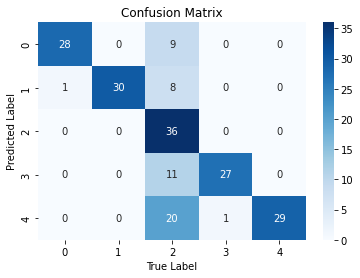

In [32]:
# The best performance was by SVM with TF-IDF, which makes it the champion model
# playing with the champion model (SVM on TF-IDF)
# 1. Changing kernel type

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Tfid, y, test_size=0.2)

# Change the kernel from rbf to poly
clf = SVC(kernel='poly', random_state=0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of SVM classifier (TF-IDF):", acc)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy of SVM classifier (TF-IDF): 0.8766666666666667
Precision: 0.9239509665252239
Recall: 0.8742639528929852
F1 Score: 0.883158641147532


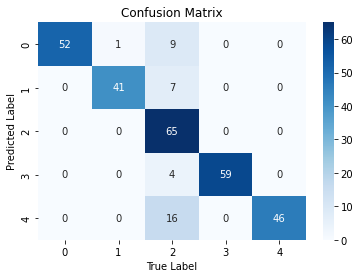

In [33]:
# 2.Changing training sample size
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Tfid, y, test_size=0.3, random_state=0)

svm = SVC(kernel='poly', C=1, random_state=0)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of SVM classifier (TF-IDF):", acc)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# 3. Changing the books with new genres
books = [ 
		{ 
            "file": 'whitman-leaves.txt',
            "author": "Whitman",
            "genre": "Non-Fiction"
        },
        {
            "file": 'shakespeare-macbeth.txt',
            "author": "Shakespeare",
            "genre": "Fiction"
        },
        {
            "file": 'austen-emma.txt',
            "author": "Austen",
            "genre": "Fiction"
        },
        {
            "file": 'blake-poems.txt',
            "author": "Willam Blake",
            "genre": "Non-Fiction"
        },
        {
            "file": 'burgess-busterbrown.txt',
            "author": "Burgess",
            "genre": "Fiction"
        }
	]

for book in books: 
	df = create_dataframe(book["file"], book["author"], book["genre"])
	book["df"] = df

result = pd.concat([x["df"] for x in books])

result

,label,text,author_name,genre
0,0_whitman-leaves.txt,float and every one of us is buoy d A Persian ...,Whitman,Non-Fiction
1,1_whitman-leaves.txt,to me I may have to be persuaded many times be...,Whitman,Non-Fiction
2,2_whitman-leaves.txt,word liquid sane unruly musical self sufficien...,Whitman,Non-Fiction
3,3_whitman-leaves.txt,and risen out of thee Thou envy of the globe t...,Whitman,Non-Fiction
4,4_whitman-leaves.txt,at the head of the regiments Approaching Manha...,Whitman,Non-Fiction
...,...,...,...,...
195,195_burgess-busterbrown.txt,they had ever known any one who lives in the G...,Burgess,Fiction
196,196_burgess-busterbrown.txt,and in the bottom of it wrapped up in a piece ...,Burgess,Fiction
197,197_burgess-busterbrown.txt,little people of the Green Forest and the Gree...,Burgess,Fiction
198,198_burgess-busterbrown.txt,else had been fishing and that was why he coul...,Burgess,Fiction


In [35]:
new_X = result['text'].values
new_y = result['author_name'].values

#TD_IDF with new dataset
tf = TfidfVectorizer(analyzer='word',min_df= 3, ngram_range=(1, 2))
Tfid = tf.fit_transform(new_X)
array_tfid = Tfid.toarray()
tfid_feature_names = tf.get_feature_names_out()
X_Tfid = pd.DataFrame(Tfid.toarray(), columns=tfid_feature_names)
X_Tfid

,1780,1780 thel,abbey,abbey mill,able,able to,aboue,aboue to,about,about and,...,your winter,yours,yourself,yourself and,youth,youth and,youth rise,youthful,youthful harlot,youthful pair
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065152,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy of SVM classifier (TF-IDF): 0.975
Precision: 0.9763492063492064
Recall: 0.9758792014605968
F1 Score: 0.9751091898004881


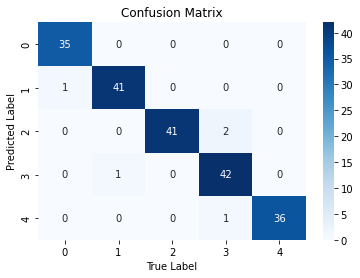

In [36]:
#SVM with TF-IDF (new dataset)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Tfid, new_y, test_size=0.2)

#Initialize the SVM classifier with a radial basis function kernel
clf = SVC(kernel='rbf', random_state=0)

#Train the classifier on the training data
clf.fit(X_train, y_train)

#Predict the labels for the test data
y_pred = clf.predict(X_test)

#Evaluate the performance of the classifier
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy of SVM classifier (TF-IDF):", acc)
print("Precision:", precision)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()